In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

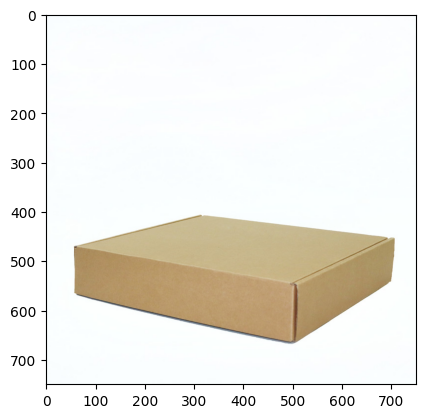

In [2]:
image = cv2.imread('./data/box.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

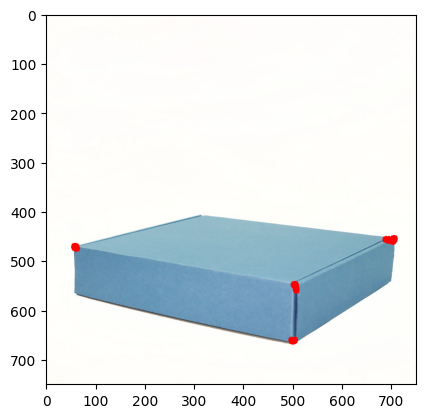

In [3]:
# 모서리 찾기
iamge_path = './data/box.png'
image_gray = cv2.imread(iamge_path, cv2.IMREAD_GRAYSCALE)
image_gray = np.float32(image_gray)

# 모서리 감지 매개변수
block_size = 4
aperture = 29 
free_parameter = 0.04

detector_responses = cv2.cornerHarris(
    image_gray,
    block_size,
    aperture,
    free_parameter
)

detector_responses = cv2.dilate(detector_responses, None) # 모서리 표시를 부각시키기 위한 함수

# 임계값 보다 큰 감지 결과만 남기고 나머지는 버리는 형태
threshold = 0.01
for i in range(detector_responses.shape[0]) :
    for j in range(detector_responses.shape[1]) :
        if detector_responses[i,j] > threshold * detector_responses.max() :
            # print(threshold * detector_responses.max())
            cv2.circle(image, [j,i], radius=5, color=(0,0,255), thickness=-1)
            
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

i는 행 인덱스를, j는 열 인덱스를 의미합니다.

따라서, cv2.circle 함수에 전달되는 중심 좌표 [j, i]는 열 좌표 j가 x축을, 행 좌표 i가 y축을 나타내는 이미지 좌표 시스템에서의 좌표입니다. 이렇게 좌표를 [j, i]로 설정함으로써 이미지 상에서 각 점에 대해 원을 그릴 수 있습니다.